In [ ]:
%pip install seaborn   

In [ ]:
%pip install scikit_learn           #=====SKLEARN  : Python library widely used for machine learning and data analysis. It provides simple and efficient tools for data mining and data analysis, 
                                    #           and it's built on top of other popular Python libraries like NumPy, SciPy, and Matplotlib.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns        # Python data visualization library built on top of Matplotlib.

In [4]:
#========== Read dataset 
df = pd.read_csv("C:/Users/umarm/Desktop/Data Analyst Work/04 Python/Projects/P01_Student Result Analysis/Raw Data_Kaggle/Expanded_data_with_more_features.csv")

In [5]:
#======= see how it looks by showing first 8 records
df.head(10)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


### **Some hugely recommended steps as data analyst to get idea of data...**

In [6]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [7]:
df.info()    # Get information like not-null columns, count(to know how much are empty) , datatype (so that if needed to change)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [8]:
df.isnull().sum() # get total null entries in each column/feature : So that accordingly we fill/remove them

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# **===========Delete un-neccessary columns/features**

In [9]:
#================== No need of first column (Unnamed: 0- > containing indexes)
df.drop("Unnamed: 0", axis=1, inplace=True)  # inplace=True : Changes to original dataset.

df.head(10)   # Remaining

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


# ============== Data Transformation

In [10]:
# ============= On another laptop , I got 10-Oct instead of 5-10 under column "WklyStudyHours"
#               But here I'm getting perfectly 5-10 (But for practice I dis transformation in that laptop by replacing 10_Oct with 5-10) as:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("10-Oct", "5-10")

df.head(10)  # Check

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


# ======== Detact Outliers in scores using BoxPlot

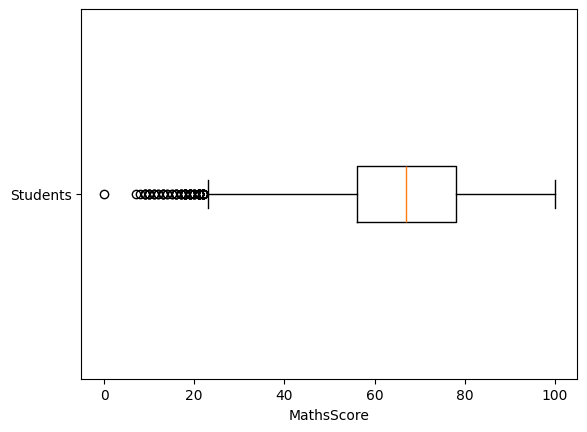

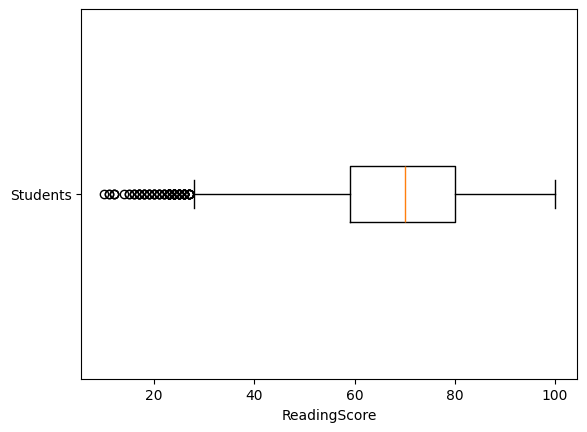

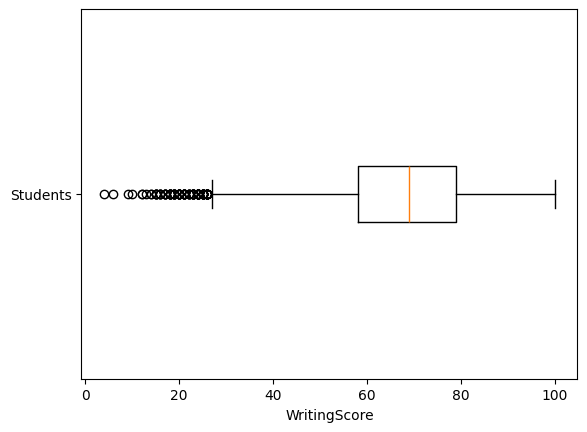

In [11]:
plt.boxplot(data=df , x = "MathScore", vert=False)
plt.xlabel("MathsScore")
plt.yticks(ticks=[1], labels=["Students"]) 
plt.show() 



plt.boxplot(data=df , x = "ReadingScore", vert=False)
plt.xlabel("ReadingScore")
plt.yticks(ticks=[1], labels=["Students"]) 
plt.show() 




plt.boxplot(data=df , x = "WritingScore", vert=False)
plt.xlabel("WritingScore")
plt.yticks(ticks=[1], labels=["Students"]) 
plt.show() 

In [12]:
# ================= Insight
## Students are weaker in math(Some scoring near to 0 and even 0) than reading and writing.

# **========= Data Analysis ============**

# 1. Gender ...

C:\Users\umarm\AppData\Local\Temp\ipykernel_17764\3680670332.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data= df, x= "Gender", palette=["#BCE122", "#FDD456"])   # Seaborn function to show count of Gender feature/data/column using countplot()   (ax : store in axes object to apply further steps)


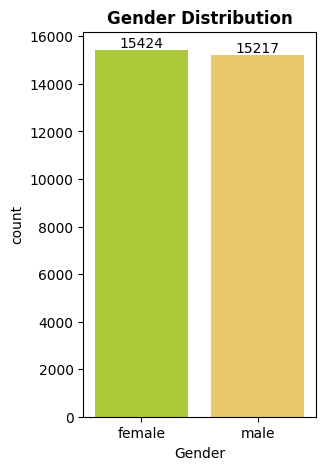

In [13]:
#========= Know gender distribution of students
plt.figure(figsize=(3,5))   # Using matplotlib's pyplot's function : Change the size of figure under it : figsize=(width, height)

ax = sns.countplot(data= df, x= "Gender", palette=["#BCE122", "#FDD456"])   # Seaborn function to show count of Gender feature/data/column using countplot()   (ax : store in axes object to apply further steps)
#                                    ^^ For different colors to each (If same then use : color="skyblue" eg)

# ax.bar_label(ax.containers[0])  # The bar_label() function is a Matplotlib function that can be used to label bars in a bar plot.Seaborn plots are built on top of Matplotlib, you can access the bars and apply the labels using Matplotlib's functions.
               # When same color to each bar:--         ax.containers[0] accesses the bar containers, and bar_label() places the corresponding count on each bar.

# Add labels to each bar  (When bars have different color)
for container in ax.containers:        # Seaborn may create multiple bar containers if bars are stacked or grouped differently.
    ax.bar_label(container)            # This method labels each bar within the current container.


plt.title("Gender Distribution", fontweight="bold")
plt.show()


In [14]:
#============ Insight of above graph:-------
# Number of females are comparitively more than males.

# 2. Impact of parent education...

In [15]:
gb = df.groupby("ParentEduc").agg({"MathScore":"mean" , "ReadingScore":"mean", "WritingScore":"mean"})

gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


<function matplotlib.pyplot.show(close=None, block=None)>

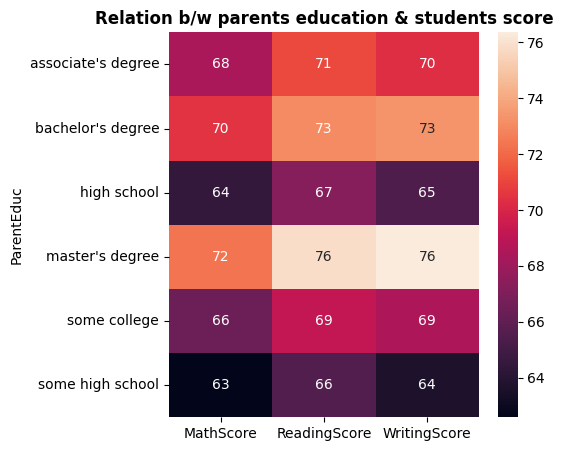

In [16]:
# sns.heatmap(data) :Seaborn plot that represents data in a matrix format, where individual values are represented by varying colors (Shows relationship).
plt.figure(figsize=(5,5))
sns.heatmap(gb, annot=True) # annot=True  : SHow values to box as label

plt.title("Relation b/w parents education & students score", fontweight="bold")
plt.show

In [17]:
#============ Insight of above graph:-------
#============= Parents education have good impact on students performance.
# Students with parents having masters & bachelors degree are scoring good in exam.
# Students with parents having high school degree are scoring lower in exam.

# 3. Impact of Parent Marital Status...

In [18]:
gb2 = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean" , "ReadingScore":"mean", "WritingScore":"mean"})
gb2

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


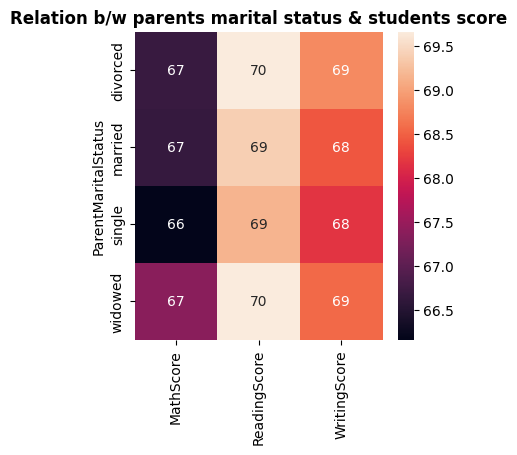

In [19]:
plt.figure(figsize=(4,4) )
sns.heatmap(gb2, annot= True)

plt.title("Relation b/w parents marital status & students score", fontweight="bold")
plt.show()

In [20]:
#============= Insights of maritalstatus of parents ============
#  There is not any major impact of marital-status of parents on students performance.

# 4. Impact of Ethnic-Group on students performance...

In [21]:
 print(df["EthnicGroup"].unique() )  # Get unique groups that students have

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [22]:
# =========== Disribution in %   (Ignoring NaN )
groupA = df.loc[(df["EthnicGroup"] == "group A"), :].count()    # return DF with count of EACH FEATURE/COLUMN in group A
groupB = df.loc[(df["EthnicGroup"] == "group B"), :].count()
groupC = df.loc[(df["EthnicGroup"] == "group C"), :].count()
groupD = df.loc[(df["EthnicGroup"] == "group D"), :].count()
groupE = df.loc[(df["EthnicGroup"] == "group E"), :].count()

#=== Demo how result looks
print(groupA)


Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64


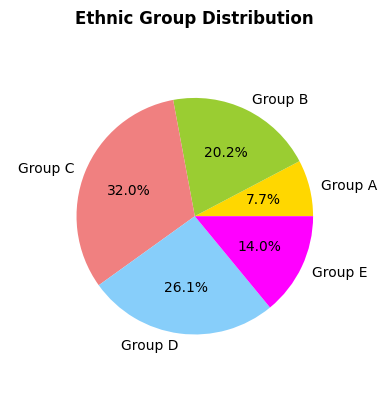

In [23]:
# Distribution of ONLY ETHNICGROUP 
data = [groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"] ]  # Need onlt ethnicgroup column count
lab = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']
clr = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'magenta']

plt.pie(data, colors=clr, labels= lab, radius=.8, autopct="%0.1f%%")

plt.title("Ethnic Group Distribution", fontweight="bold")
plt.show()

In [24]:
#============== Insights
## There are majorly students from groups in order: Group C, Group D, Group B, Group E, Group A.

In [25]:
# ============ Students scores based on ethnic group
gb3 = df.groupby("EthnicGroup").agg({"MathScore":"mean" , "ReadingScore":"mean", "WritingScore":"mean"})
gb3

,MathScore,ReadingScore,WritingScore
EthnicGroup,,,
group A,62.991888,66.787742,65.251915
group B,63.490216,67.320460,65.895125
group C,64.695723,68.438233,66.999240
group D,67.666400,70.382247,70.890844
group E,75.298936,74.251423,72.677060


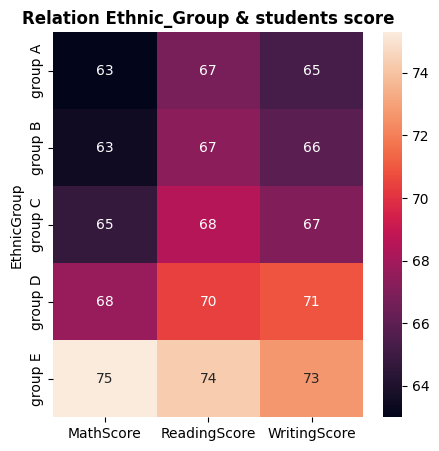

In [26]:
plt.figure(figsize=(5,5) )   # Check visually
sns.heatmap(gb3, annot= True)

plt.title("Relation Ethnic_Group & students score", fontweight="bold")
plt.show()

In [27]:
# ============== Insights
# From ethnic group E & D , students are performing better. Than ethnic groups A, B & C which perform almost with neglegible difference. 

# 5. Impact of Practice-Score on students Performance...

In [28]:
gb4 = df.groupby("TestPrep").agg({"MathScore":"mean" , "ReadingScore":"mean", "WritingScore":"mean"})
gb4

,MathScore,ReadingScore,WritingScore
TestPrep,,,
completed,69.54666,73.732998,74.703265
none,64.94877,67.051071,65.092756


In [29]:
#============= Insights
## Students who have completed test preperation have scored well in all three tests.

# **6. Impact of Sports-Practice on students Performance...**

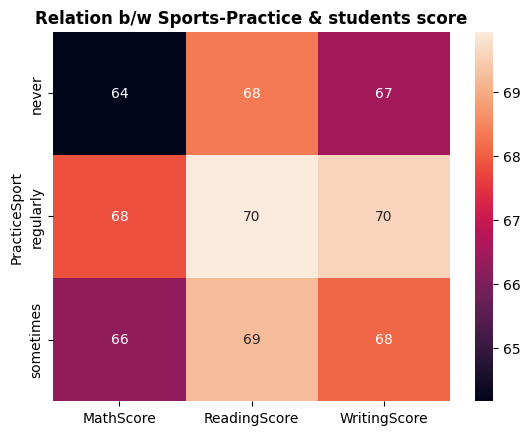

In [30]:
gb5 = df.groupby("PracticeSport").agg({"MathScore":"mean" , "ReadingScore":"mean", "WritingScore":"mean"})

sns.heatmap(gb5, annot= True)

plt.title("Relation b/w Sports-Practice & students score", fontweight="bold")
plt.show()

In [31]:
#============== Insights
## Students who practice sports regularly perform better then those who never practice or practice sometimes.

# **7. Impact of Lunch-Type on students Performance...**

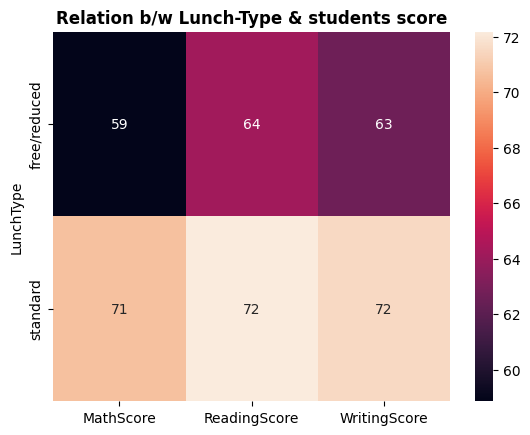

In [32]:
gb6 = df.groupby("LunchType").agg({"MathScore":"mean" , "ReadingScore":"mean", "WritingScore":"mean"})

sns.heatmap(gb6, annot= True)

plt.title("Relation b/w Lunch-Type & students score", fontweight="bold")
plt.show()

In [33]:
#=============== Insights
## Students who do standard lunch perform better in exams.

# **7. Impact of Family-Size(No of siblings) on students Performance...**

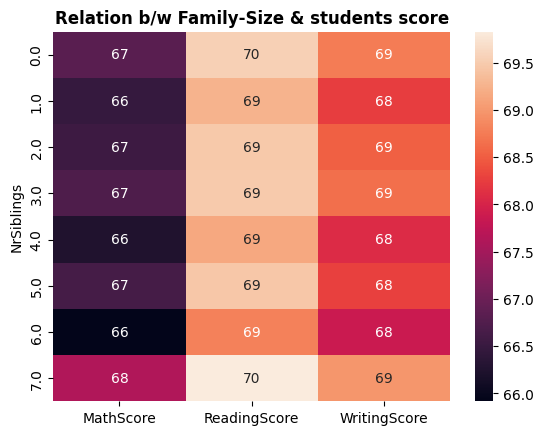

In [34]:
gb7 = df.groupby("NrSiblings").agg({"MathScore":"mean" , "ReadingScore":"mean", "WritingScore":"mean"})

sns.heatmap(gb7, annot= True)

plt.title("Relation b/w Family-Size & students score", fontweight="bold")
plt.show()

In [35]:
#==================== Insights
## There is not any major impact of family-size(No of siblings) on students performance.